# Titanic Passenger Data 

This classic dataset about the information on passengers aboard the [RMS Titanic](https://en.wikipedia.org/wiki/RMS_Titanic) which was travelling from Southampton to New York City in the year 1912. The dataset contains information on the passenger details like age, sex, cabin class, ticket fare and whether the passenger survived or not.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/abkds/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Let us check the total number of data points available in the data set.

In [2]:
titanic_data = pd.read_csv('titanic_data.csv')

In [3]:
print "Total data points: {}".format(len(titanic_data))

# print some sample data points
titanic_data.head()

Total data points: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Before marching ahead, we will first check whether there are any missing values or cleaning that needs to be done.

In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since we have so many missing values in the **Cabin** column, we will drop the column. Analysing the tickets also, would not be of much practical use either, so we will drop the columns.

In [5]:
titanic_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

We have removed the **Cabin** and **Ticket** axis but still we have so many NaN in the **Age** column. We will go ahead and remove those rows, which contain NaN values for age.

In [6]:
titanic_data = titanic_data[pd.notnull(titanic_data['Age'])]

Let's have a look at the data remaining and analyze if any more cleaning needs to be done. Ofcourse we would return to more cleaning if we encounter problems during the explrolation phase.  

In [7]:
print titanic_data.isnull().sum()
print '\n'
print 'Data points remaining after cleaning: {}'.format(len(titanic_data))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64


Data points remaining after cleaning: 714


### Who all were travelling on the Titanic ? 

A demographics of the people travelling on the Titanic would give us a good idea. A histogram depicting the demographics can be plotted.

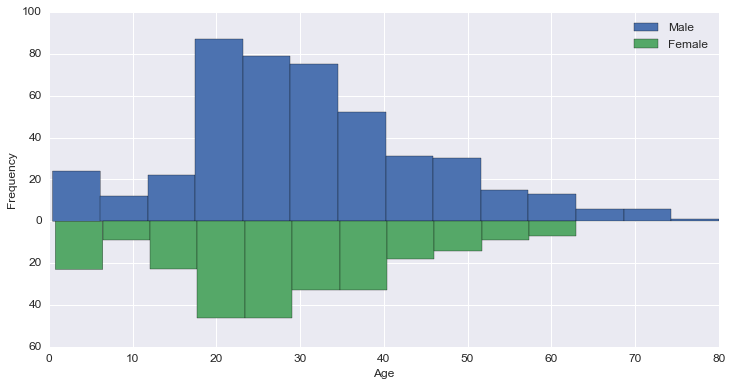

In [8]:
titanic_data_by_sex = titanic_data.groupby(['Sex'])

titanic_data_male = titanic_data_by_sex.get_group('male')
titanic_data_female = titanic_data_by_sex.get_group('female')

plt.figure(figsize=(12, 6))
plt.hist(titanic_data_male['Age'], bins=14, label='Male')
plt.hist(titanic_data_female['Age'], weights=[-1 for _ in range(len(titanic_data_female))], bins=11, label='Female')
ax = plt.gca()

from matplotlib import ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: int(np.abs(x))))
plt.xlim([0, 80])

# labelling the axis
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# formatting the legend
plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='both', which='major', labelsize=12)

As seen from the plot, we can see that most of the males and females were from the age group 18-40. Let us find the percentage of people from that age group for the entire passenger list, male passengers and female passengers respectively.

In [9]:
def percent_in_18_to_40(data):
    age_in_18_to_40 = ((data['Age'] < 40) & (data['Age'] > 18)).sum()
    return age_in_18_to_40 * 100/len(data['Age'])

print 'Percentage of passengers in age group 18-40: {}%'.format(percent_in_18_to_40(titanic_data))
print 'Percentage of male passengers in age group 18-40: {}%'.format(percent_in_18_to_40(titanic_data_male))
print 'Percentage of female passengers in age group 18-40: {}%'.format(percent_in_18_to_40(titanic_data_female))

Percentage of passengers in age group 18-40: 57%
Percentage of male passengers in age group 18-40: 60%
Percentage of female passengers in age group 18-40: 53%


As depicted by the histograms, the numbers also show that majority of the male and female passengers were in the age group of 18 to 40. Since we have already plotted the histogram, we will also plot the age distributions of the passengers travelling.

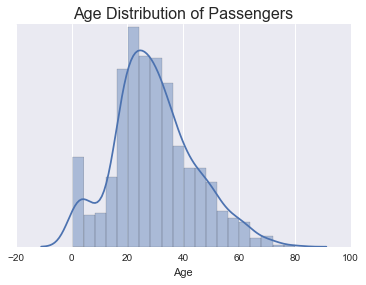

In [10]:
# plotting the age 
sns.distplot(titanic_data['Age'])
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title('Age Distribution of Passengers', fontdict={'fontsize': 16})

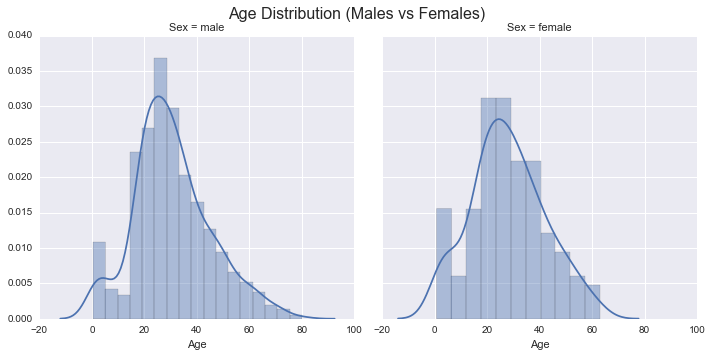

In [11]:
facet_grid = sns.FacetGrid(titanic_data, col='Sex', size=5, aspect=1)
facet_grid.map(sns.distplot, "Age")
plt.subplots_adjust(top=0.9)
facet_grid.fig.suptitle('Age Distribution (Males vs Females)', fontsize=16)

We will just crackdown into age to find age details for all class (passenger class - 1st, 2nd or 3rd) and gender combinations.

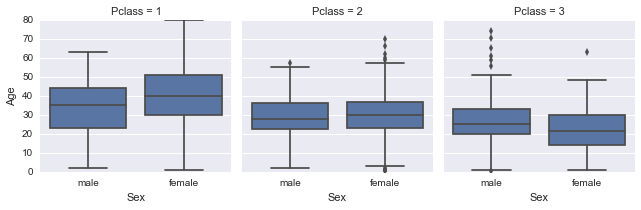

In [12]:
# use facet grid for a box plot of age distribution
g = sns.FacetGrid(titanic_data, col="Pclass")
g.map(sns.boxplot, "Sex", "Age")

Looks interesting, plots depict that passengers travelling in the 1st class were older compared to passengers travelling in the 2nd and 3rd class. Let us quickly print the statistics for the above generated plot. 

In [13]:
groups = titanic_data.groupby(["Pclass", "Sex"])

In [14]:
groups["Age"].describe()

Pclass  Sex          
1       female  count     85.000000
                mean      34.611765
                std       13.612052
                min        2.000000
                25%       23.000000
                50%       35.000000
                75%       44.000000
                max       63.000000
        male    count    101.000000
                mean      41.281386
                std       15.139570
                min        0.920000
                25%       30.000000
                50%       40.000000
                75%       51.000000
                max       80.000000
2       female  count     74.000000
                mean      28.722973
                std       12.872702
                min        2.000000
                25%       22.250000
                50%       28.000000
                75%       36.000000
                max       57.000000
        male    count     99.000000
                mean      30.740707
                std       14.793894
      

These are the same descriptive statistics for the generated box plots, now we get the exact numbers for the 25, 50 and 75 percentile of the various passenger class, gender combinations. Seaborn provides something even more interesting called a swarm plot, if we do a simple scatterplot with categorical variables then many points will overlap, this can be avoided by adding some random jittering, but swarm plots have an algorithm built-in to avoid overlapping of the points which looks better than random jittering. Same plot but this time, Swarm !

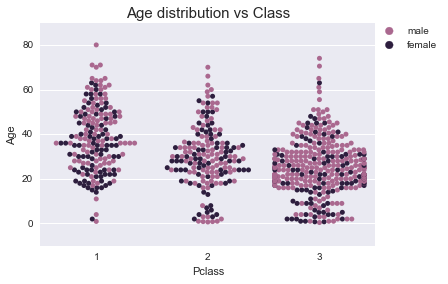

In [15]:
sns.swarmplot(x="Pclass", y="Age", hue="Sex", data=titanic_data, 
              palette=sns.cubehelix_palette(2, light=0.5))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.title("Age distribution vs Class", fontsize=15)

Plotting the age against all possible combinations of embarked location and passenger class 

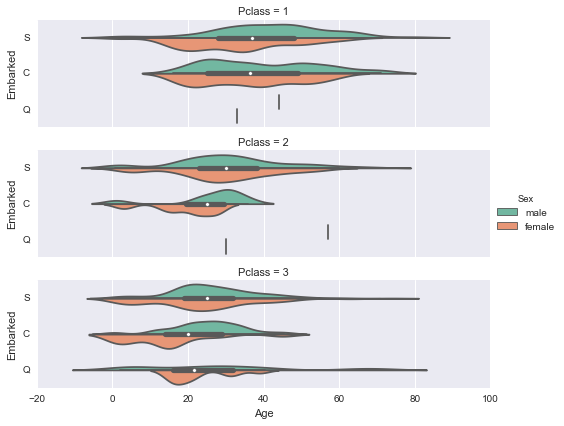

In [16]:
# violin plot
sns.factorplot(x="Age", y="Embarked", hue="Sex", row="Pclass", 
               data=titanic_data, orient="h", size=2, aspect=3.5, 
               palette="Set2", kind="violin", split=True, bw=0.3)

### Enter "Survival"

Till now we have toying around with ages of the passengers on board the titanic. I know, it started becoming boring. Enter "survival", lets take into account the "survived" column. This would give us insights on characteristics of the passengers who survived. Take a deep breath, because a lot of plots are coming !!

Let us have a look at some pure numbers on survivals. We will be plotting survival against various factors. Plotting survival against gender. 

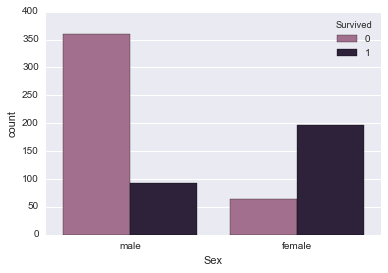

In [17]:
# count plot for exact numbers 
sns.countplot(x="Sex", hue="Survived", data=titanic_data, 
             palette=sns.cubehelix_palette(2, light=0.5));

In [18]:
# using pandas to find count 
# use group by pandas 
groupby_gender_survival = titanic_data.groupby(["Sex", "Survived"])
groupby_gender_survival.apply(len)

Sex     Survived
female  0            64
        1           197
male    0           360
        1            93
dtype: int64

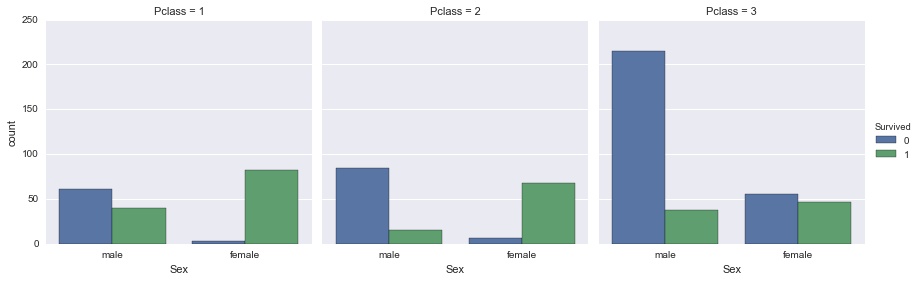

In [19]:
# Passenger class wise distribution of counts of survival statistics for men and women
g = sns.factorplot("Sex", col="Pclass", data=titanic_data, kind="count", hue="Survived")

In [20]:
# print exact count using groupby pandas
grouped = titanic_data.groupby(["Sex", "Pclass", "Survived"])
grouped.apply(len)

Sex     Pclass  Survived
female  1       0             3
                1            82
        2       0             6
                1            68
        3       0            55
                1            47
male    1       0            61
                1            40
        2       0            84
                1            15
        3       0           215
                1            38
dtype: int64

So we have the counts. But it's more interesting to study the survival in terms of ratios or percentages. So, to plot
the survival ratio for various classes in terms of histograms , we will also plot the confidence intervals. This is provided by `seaborn` out of the box. Since we are taking only around 700 data points which is of course not the compltete data, so it's like a sample from an underlying observation, whose mean and standard deviation we don't know. 
In such cases there is technique called _**bootstrapping**_ used to have confidence intervals for the data. Not going into the details here, if one wants to read about the technique, you can read about it [here](http://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf).

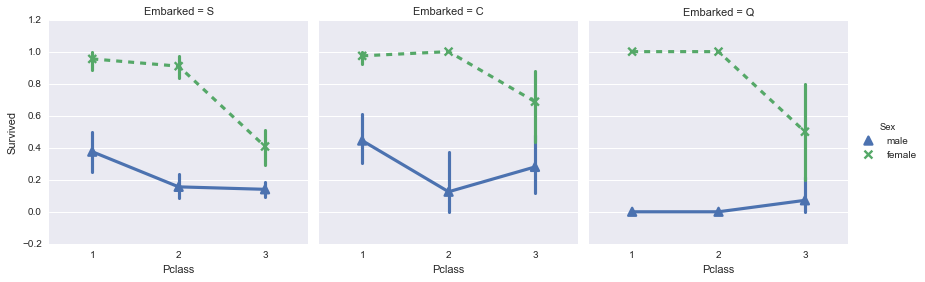

In [21]:
sns.factorplot(x="Pclass", y="Survived", kind="point", 
               hue="Sex", col="Embarked", data=titanic_data,
               markers=["^", "x"], linestyles=["-", "--"])

The above plot shows survival ratios (with confidence intervals, 95% default) of male and females of various classes and also the places from where they embarked. In general we can see that females had a higher survival ratio than that of males. One more interesting trend is that people travelling in upper class (basically rich people) also had a higher survival ratio than those in lower classes. A similar plot for the entire dataset (not grouped by embarked location) would look like this.

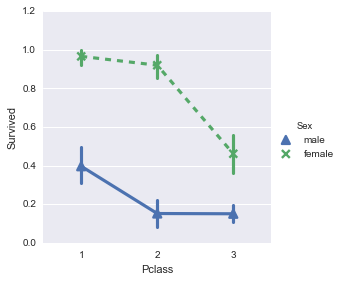

In [22]:
sns.factorplot(x="Pclass", y="Survived", kind="point", 
               hue="Sex", data=titanic_data,
               markers=["^", "x"], linestyles=["-", "--"])

Again we will use Pandas to get the exact numbers in the plot.

In [23]:
# survival ratios based on class and emabarked location
grouped = titanic_data.groupby(["Sex", "Pclass", "Embarked"])
grouped["Survived"].mean()

Sex     Pclass  Embarked
female  1       C           0.973684
                Q           1.000000
                S           0.954545
        2       C           1.000000
                Q           1.000000
                S           0.909091
        3       C           0.687500
                Q           0.500000
                S           0.407895
male    1       C           0.444444
                Q           0.000000
                S           0.375000
        2       C           0.125000
                Q           0.000000
                S           0.155556
        3       C           0.280000
                Q           0.071429
                S           0.140187
Name: Survived, dtype: float64

In [24]:
# overall survival ratio based on class and gender
grouped = titanic_data.groupby(["Sex", "Pclass"])
survival_ratio = grouped["Survived"].mean()

# print all survival ratios
gender = ["male", "female"]
Pclass = [1, 2, 3]

for i in range(len(gender)):
    for j in range(len(Pclass)):
        print "Class {}, {} survival ratio: {:.2f}".format(Pclass[j], 
            gender[i].title(), survival_ratio[gender[i], Pclass[j]])

Class 1, Male survival ratio: 0.40
Class 2, Male survival ratio: 0.15
Class 3, Male survival ratio: 0.15
Class 1, Female survival ratio: 0.96
Class 2, Female survival ratio: 0.92
Class 3, Female survival ratio: 0.46


Although we didn't plot the overall survival ratios for both genders (we plotted their counts), we will also find the overal survival ration based on gender.

In [25]:
# survival ratio based on gender
grouped = titanic_data.groupby(["Sex"])
survival_ratio = grouped["Survived"].mean()
print "Female survival ratio: {:.2f}".format(survival_ratio['female'])
print "Male survival ratio: {:.2f}".format(survival_ratio['male'])

Female survival ratio: 0.75
Male survival ratio: 0.21


That was all about counts and ratios of the overall passengers who survived, but we haven't yet analyzed the "ages" of passengers and how age relates with survival statistics. 

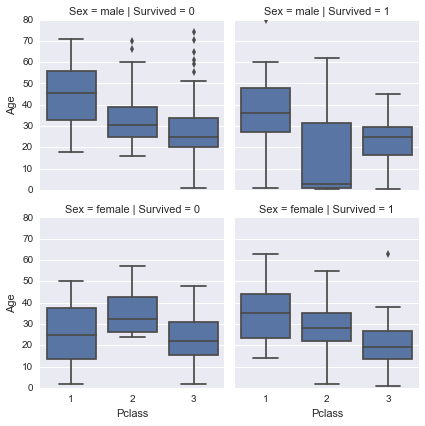

In [26]:
facet_grid = sns.FacetGrid(titanic_data, col='Survived', row='Sex')
facet_grid.map(sns.boxplot, "Pclass", "Age")

From the plots we can observe that, age of the passengers surviving tends to be on the younger side on average, but still there are exceptions like in case of passenger class 1 females. The mean age for passenger class 1 females, who survived is more than that of who died.